<a href="https://colab.research.google.com/github/dipbanik/COVID-19/blob/master/India_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"Hello World! Let's talk Corona, or COVID-19...   - Diptangshu Banik"


"Hello World! Let's talk Corona, or COVID-19...   - Diptangshu Banik"

In [0]:
import pandas as pd

In [3]:
# Getting the latest dataset on confirmed covid cases from the repo maintained by Johns Hopkins CSSE. All data rights to them.
# 
!wget -nc https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

File ‘time_series_19-covid-Confirmed.csv’ already there; not retrieving.



In [0]:
conf = pd.read_csv('time_series_19-covid-Confirmed.csv')
#death = pd.read_csv('time_series_19-covid-Deaths.csv')
#recov = pd.read_csv('time_series_19-covid-Recovered.csv')

In [5]:
conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566


In [6]:
conf['Province/State'].describe()

count                316
unique               314
top       Grand Princess
freq                   2
Name: Province/State, dtype: object

In [0]:
#Getting a new column as an amalgamation of Country and state since US and China have segregation according to states as well.
conf['Region'] = conf['Country/Region'].str.cat(conf[['Province/State']], sep=' - ', na_rep='')

In [8]:
conf.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,Region
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147,Thailand -
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825,Japan -
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243,Singapore -
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Nepal -
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566,Malaysia -


In [9]:
cols = conf.columns; cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', 'Region'],
      dtype='object')

In [10]:
#Bringing the newly formed column at the beginning of the dataset
cols = list(cols)
cols = cols[-1:] + cols[:-1]
conf = conf[cols]
conf.head()

,Region,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,Thailand -,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114,147
1,Japan -,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,7,7,11,15,20,20,20,22,22,45,25,25,26,26,26,28,28,29,43,59,66,74,84,94,105,122,147,159,170,189,214,228,241,256,274,293,331,360,420,461,502,511,581,639,639,701,773,839,825
2,Singapore -,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,7,7,10,13,16,18,18,24,28,28,30,33,40,45,47,50,58,67,72,75,77,81,84,84,85,85,89,89,91,93,93,93,102,106,108,110,110,117,130,138,150,150,160,178,178,200,212,226,243
3,Nepal -,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Malaysia -,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,4,7,8,8,8,8,8,10,12,12,12,16,16,18,18,18,19,19,22,22,22,22,22,22,22,22,22,22,22,22,23,23,25,29,29,36,50,50,83,93,99,117,129,149,149,197,238,428,566


In [11]:
# will use this code snippet to find the latest data. 
# This is being done to make the code reusable since data is being updated daily and new columns are being added.
import datetime as dt
da = dt.datetime.today()
while 1:
  date_tod = da.strftime("%m/%d/%Y")
  date_tod = date_tod[:-2]
  if date_tod[0] == '0':
    date_tod = date_tod[1:]
  print(date_tod)
  if date_tod in conf.columns:
    da = date_tod
    break
  else:
    da = da - dt.timedelta(days=1)
da

3/17/20
3/16/20


'3/16/20'

In [0]:
#Rearranging the data in dedcending order for the region with the highest number of confirmed cases.
conf= conf.sort_values(by=da,axis = 0, ascending=False)

In [13]:
conf.head()

,Region,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
154,China - Hubei,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,3554,3554,4903,5806,7153,11177,13522,16678,19665,22112,24953,27100,29631,31728,33366,33366,48206,54406,56249,58182,59989,61682,62031,62442,62662,64084,64084,64287,64786,65187,65596,65914,66337,66907,67103,67217,67332,67466,67592,67666,67707,67743,67760,67773,67781,67786,67790,67794,67798
16,Italy -,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
155,Iran -,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
18,Spain -,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942
156,"Korea, South -",NaN,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236


In [0]:
#Removing all china data as China was affected very initially and has reacted to
# this pandemic in a very different way than any other country.
conf_NonChina = conf[conf['Country/Region'] != 'China']

In [15]:
conf_NonChina.head()

,Region,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
16,Italy -,NaN,Italy,43.0,12.0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
155,Iran -,NaN,Iran,32.0,53.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
18,Spain -,NaN,Spain,40.0,-4.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942
156,"Korea, South -",NaN,"Korea, South",36.0,128.0,1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236
11,Germany -,NaN,Germany,51.0,9.0,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272


In [0]:
#dropping unuseful columns
conf_NonChina = conf_NonChina.drop(columns = ['Lat','Long'])


In [0]:
#Diamond Princess is an outlier and thus it's details are also being removed.
conf_NonChina = conf_NonChina[conf_NonChina['Province/State'] != 'Diamond Princess']

In [18]:
conf_NonChina.head(25)

,Region,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
16,Italy -,NaN,Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
155,Iran -,NaN,Iran,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
18,Spain -,NaN,Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942
156,"Korea, South -",NaN,"Korea, South",1,1,2,2,3,4,4,4,4,11,12,15,15,16,19,23,24,24,25,27,28,28,28,28,28,29,30,31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236
11,Germany -,NaN,Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272
157,France - France,France,France,0,0,2,3,3,3,4,5,5,5,6,6,6,6,6,6,6,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,14,18,38,57,100,130,191,204,285,377,653,949,1126,1209,1784,2281,2281,3661,4469,4499,6633
31,Switzerland -,NaN,Switzerland,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,8,8,18,27,42,56,90,114,214,268,337,374,491,652,652,1139,1359,2200,2200
404,United Kingdom - United Kingdom,United Kingdom,United Kingdom,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,8,8,9,9,9,9,9,9,9,9,9,9,9,9,13,13,13,15,20,23,36,40,51,85,115,163,206,273,321,382,456,456,798,1140,1140,1543
446,Netherlands - Netherlands,Netherlands,Netherlands,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,10,18,24,38,82,128,188,265,321,382,503,503,804,959,1135,1413
39,Norway -,NaN,Norway,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,6,15,19,25,32,56,87,108,147,176,205,400,598,702,996,1090,1221,1333


In [0]:
#Identifying data for India
ind = conf_NonChina[conf_NonChina['Country/Region'] == 'India']

In [0]:
#Removing all data before Feb 17 as very few cases were reported outside China before that.
non_ind = conf_NonChina.drop(columns = ['Province/State',	'Country/Region', '1/22/20',	'1/23/20',	'1/24/20',	'1/25/20',	'1/26/20',	'1/27/20',	'1/28/20',	'1/29/20',	'1/30/20',	'1/31/20',	'2/1/20',	'2/2/20',	'2/3/20',	'2/4/20',	'2/5/20',	'2/6/20',	'2/7/20',	'2/8/20', '2/9/20',	'2/10/20',	'2/11/20',	'2/12/20',	'2/13/20',	'2/14/20',	'2/15/20',	'2/16/20', '2/17/20'])
ind = ind.drop(columns = ['Province/State',	'Country/Region', '1/22/20',	'1/23/20',	'1/24/20',	'1/25/20',	'1/26/20',	'1/27/20',	'1/28/20',	'1/29/20',	'1/30/20',	'1/31/20',	'2/1/20',	'2/2/20',	'2/3/20',	'2/4/20',	'2/5/20',	'2/6/20',	'2/7/20',	'2/8/20', '2/9/20',	'2/10/20',	'2/11/20',	'2/12/20',	'2/13/20',	'2/14/20',	'2/15/20',	'2/16/20', '2/17/20'])

There are 150+ countries where this disease has spread. Let us take a look at the 20 countries with the highest number of confirmed COVID-19 cases

In [0]:
non_ind = non_ind.head(20)

In [22]:
non_ind.head()

,Region,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
16,Italy -,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
155,Iran -,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
18,Spain -,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942
156,"Korea, South -",31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236
11,Germany -,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272


In [23]:
list(non_ind['Region'])

['Italy - ',
 'Iran - ',
 'Spain - ',
 'Korea, South - ',
 'Germany - ',
 'France - France',
 'Switzerland - ',
 'United Kingdom - United Kingdom',
 'Netherlands - Netherlands',
 'Norway - ',
 'Sweden - ',
 'Belgium - ',
 'Austria - ',
 'US - New York',
 'Denmark - Denmark',
 'US - Washington',
 'Japan - ',
 'Malaysia - ',
 'US - California',
 'Qatar - ']

In [0]:
#Resetting the index to region to represent on graph
non_ind.index = list(non_ind['Region'])
ind.index = ['India']

In [0]:
non_ind = non_ind.drop(columns=['Region'])
ind = ind.drop(columns=['Region'])

In [26]:
non_ind.head(2)

,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Italy -,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
Iran -,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991


In [27]:
non_ind.head()

,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
Italy -,3,3,3,20,62,155,229,322,453,655,888,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
Iran -,0,2,5,18,28,43,61,95,139,245,388,593,978,1501,2336,2922,3513,4747,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
Spain -,2,2,2,2,2,2,2,6,13,15,32,45,84,120,165,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942
"Korea, South -",31,31,104,204,433,602,833,977,1261,1766,2337,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236
Germany -,16,16,16,16,16,16,16,17,27,46,48,79,130,159,196,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272


In [0]:
#Transpose to replicate the data in terms of date and country. Makes more sense while plotting.
non_ind = non_ind.T
ind = ind.T

In [29]:
non_ind.tail(5)

,Italy -,Iran -,Spain -,"Korea, South -",Germany -,France - France,Switzerland -,United Kingdom - United Kingdom,Netherlands - Netherlands,Norway -,Sweden -,Belgium -,Austria -,US - New York,Denmark - Denmark,US - Washington,Japan -,Malaysia -,US - California,Qatar -
3/12/20,12462,10075,2277,7869,2078,2281,652,456,503,702,599,314,302,328,615,442,639,149,221,262
3/13/20,17660,11364,5232,7979,3675,3661,1139,798,804,996,814,559,504,421,801,568,701,197,282,320
3/14/20,21157,12729,6391,8086,4585,4469,1359,1140,959,1090,961,689,655,525,827,572,773,238,340,337
3/15/20,24747,13938,7798,8162,5795,4499,2200,1140,1135,1221,1022,886,860,732,864,643,839,428,426,401
3/16/20,27980,14991,9942,8236,7272,6633,2200,1543,1413,1333,1103,1058,1018,967,914,904,825,566,557,439


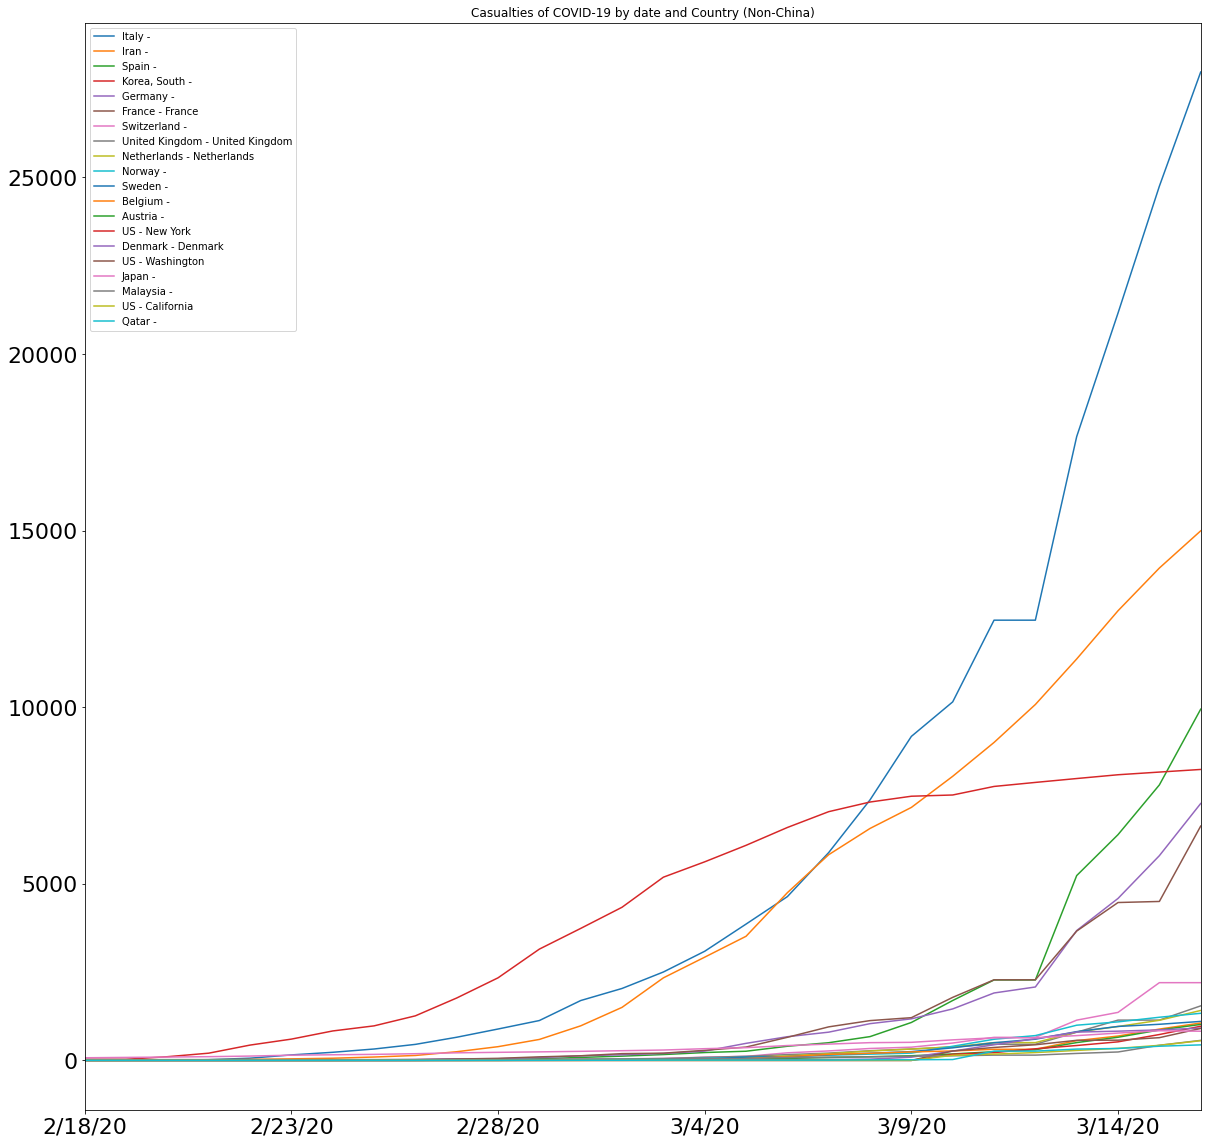

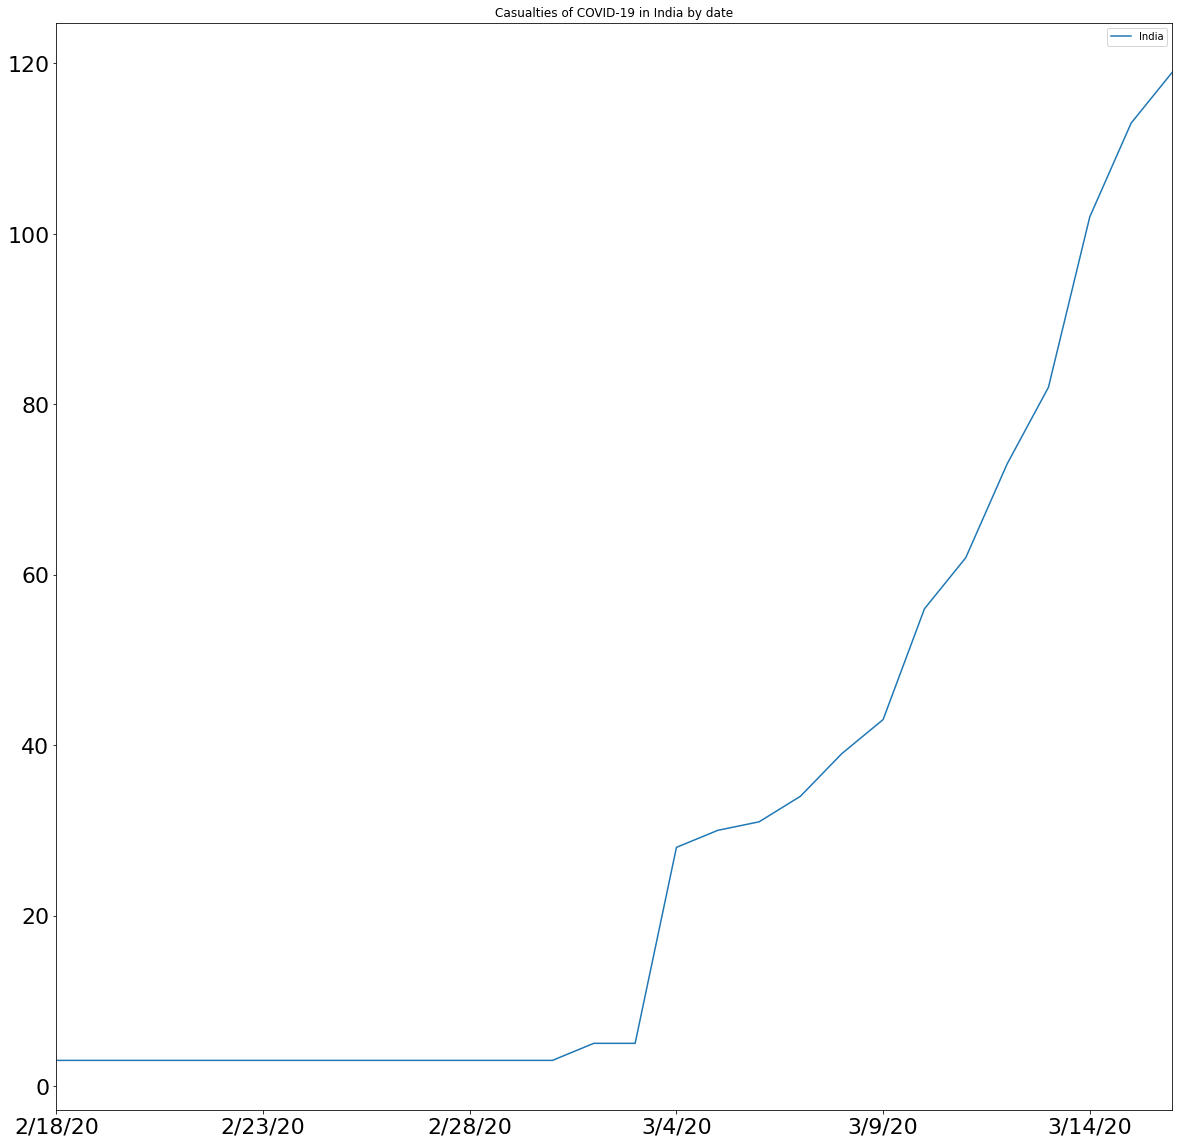

In [30]:
non_ind.plot(fontsize = 22,legend = True, grid = False, title = "Casualties of COVID-19 by date and Country (Non-China)", figsize= (20,20) )
ind.plot(fontsize = 22,legend = True, grid = False, title = "Casualties of COVID-19 in India by date", figsize= (20,20) )

Final Summary - The plot clearly shows the steep curve with which India is growing. We know by now that this virus spreads exponentially from host to host. Italy, Iran and Spain are the best examples.

India is on a close map if we look at the slope of the graph. If India does not control the spread of the virus at this stage, it will be facing a scenario which it will not be able to handle. This is high time for the citizens to be vigil and to stay put. Please stay indoors and avoid contact with other people at all means. SELF-QUARANTINE! 